In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import gc

gc.collect()
torch.cuda.empty_cache()

#from torch.utils.tensorboard import SummaryWriter
#%reload_ext tensorboard
#log_folder = './logs9'
#writer = SummaryWriter()


In [2]:
def get_data():
    data_dir = './Data'
    
    transform = transforms.Compose(
    [transforms.Resize((300,300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],
                         std=[0.5])])

    trainSet = datasets.ImageFolder(data_dir + '/TrainSet', transform=transform)
    print(len(trainSet))
    #validSet = datasets.ImageFolder(data_dir + '/ValidSet', transform=transform)
    #testSet = datasets.ImageFolder(data_dir + '/TestSet', transform=transform)

    train = DataLoader(trainSet, batch_size=32, shuffle=True)
    #valid = DataLoader(validSet, batch_size=32, shuffle=False)
    #test = DataLoader(testSet, batch_size=32, shuffle=False)

    return train#, valid,test

93


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


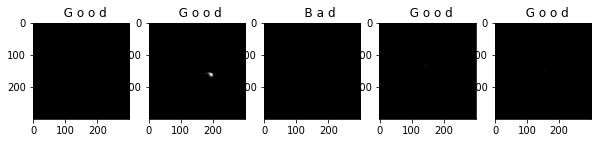

3


In [3]:
def train_imshow():
    classes = ('Bad', 'Good')
    dataiter = iter(train_loader)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(10, 4), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0))
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
    plt.show()

train_loader= get_data()#, val_loader,test_loader 
train_imshow()
print(len(train_loader))


In [4]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1  = nn.Linear(in_features= 7*7*52, out_features= 4096)
        self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=1)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5) #dropout was included to combat overfitting
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

In [5]:
device="cpu"
model = VGG16().to(device)
model.train()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)


In [6]:
epochs = 50

for epoch in range(epochs):
    epoch_loss =0
    epoch_accuracy = 0
    
    for data,label in train_loader:
        data= data.to(device)
        label = label.to(device)
        
        output = model(data)
        label = label.unsqueeze(-1)
        label = label.to(torch.float32)
        loss = criterion(output,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1)==label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x41472 and 2548x4096)

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        print(outputs)
        predicted_targets = outputs.argmax(dim=1)
        print(predicted_targets)
        total += labels.size(0)
        correct += (predicted_targets == labels).sum().item()

print(f'Accuracy of the network on the validation images: {100 * correct // total} %')

NameError: name 'test_loader' is not defined